<a href="https://colab.research.google.com/github/sugiawan2402/RESNET50_CANCER_CLASSIFICATION/blob/main/RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
!ls '/content/gdrive/My Drive/data/dataset'

runs  test  test.cache	train  train.cache  valid


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [10]:
data_dir = '/content/gdrive/My Drive/data/dataset'

In [14]:
data_dir = '/content/gdrive/My Drive/data/dataset'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')


In [16]:
from torchvision import transforms

In [17]:
# Define data transforms for training, validation, and testing
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}


In [19]:
import torch

In [21]:
from torchvision import datasets

In [22]:
data_loaders = {
    'train': torch.utils.data.DataLoader(datasets.ImageFolder(train_dir, data_transforms['train']), batch_size=64, shuffle=True),
    'valid': torch.utils.data.DataLoader(datasets.ImageFolder(valid_dir, data_transforms['valid']), batch_size=32),
    'test': torch.utils.data.DataLoader(datasets.ImageFolder(test_dir, data_transforms['test']), batch_size=32)
}


In [24]:
from torchvision import models

In [26]:
from torch import nn

In [29]:
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, output_dim)

TypeError: ignored

In [30]:
# Import necessary libraries
from google.colab import drive
import os
import copy
import pandas as pd
import numpy as np
import random

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm

# Mount Google Drive
drive.mount('/content/gdrive')

# Set Dataset Paths
data_dir = '/content/gdrive/My Drive/data/dataset'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

# Define data transforms for training, validation, and testing
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Define output dimension (number of classes)
output_dim = 3  # Adjust the number of classes based on your dataset


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [32]:
num_epochs = 10

for epoch in range(num_epochs):
    for phase in ['train', 'valid']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        corrects = 0

        for inputs, labels in data_loaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(data_loaders[phase].dataset)
        epoch_acc = corrects.double() / len(data_loaders[phase].dataset)

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


train Loss: 9.1243 Acc: 0.0000
valid Loss: 9.2155 Acc: 0.5333
train Loss: 3.9593 Acc: 0.4510
valid Loss: 19.7719 Acc: 0.5333
train Loss: 2.1172 Acc: 0.7059
valid Loss: 6.9710 Acc: 0.5333
train Loss: 1.6883 Acc: 0.6667
valid Loss: 9.7824 Acc: 0.4000
train Loss: 2.0308 Acc: 0.6667
valid Loss: 23.3399 Acc: 0.6000
train Loss: 0.9942 Acc: 0.7843
valid Loss: 56.8626 Acc: 0.4667
train Loss: 0.6060 Acc: 0.8235
valid Loss: 75.7329 Acc: 0.4667
train Loss: 0.2863 Acc: 0.9216
valid Loss: 105.5528 Acc: 0.3333
train Loss: 0.3257 Acc: 0.9412
valid Loss: 142.2518 Acc: 0.3333
train Loss: 0.3203 Acc: 0.8824
valid Loss: 151.6135 Acc: 0.3333


In [34]:
# Set the path where you want to save the model
model_save_path = '/content/gdrive/My Drive/data/resnet50/resnet50_model.pth'

# Save the trained model
torch.save(model.state_dict(), model_save_path)


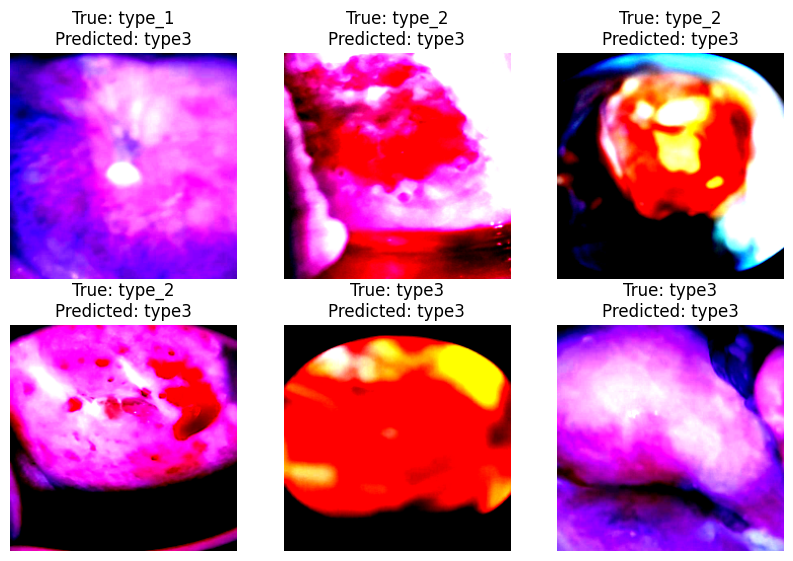

In [35]:
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Define a function to show images and predictions
def show_images_predictions(images, labels, predictions):
    class_names = ['type_1', 'type_2', 'type3']  # Gantilah dengan nama kelas sesuai dataset Anda
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).cpu().numpy())
        true_label = class_names[labels[i]]
        predicted_label = class_names[predictions[i]]
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')

# Define a function to perform inference on a batch of test data
def inference_on_test_data(model, data_loader):
    model.eval()
    images = []
    labels = []
    predictions = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            images.extend(inputs.cpu())
            labels.extend(targets)
            predictions.extend(preds)

    show_images_predictions(images, labels, predictions)

# Perform inference on a batch of test data
inference_data_loader = data_loaders['test']
inference_on_test_data(model, inference_data_loader)


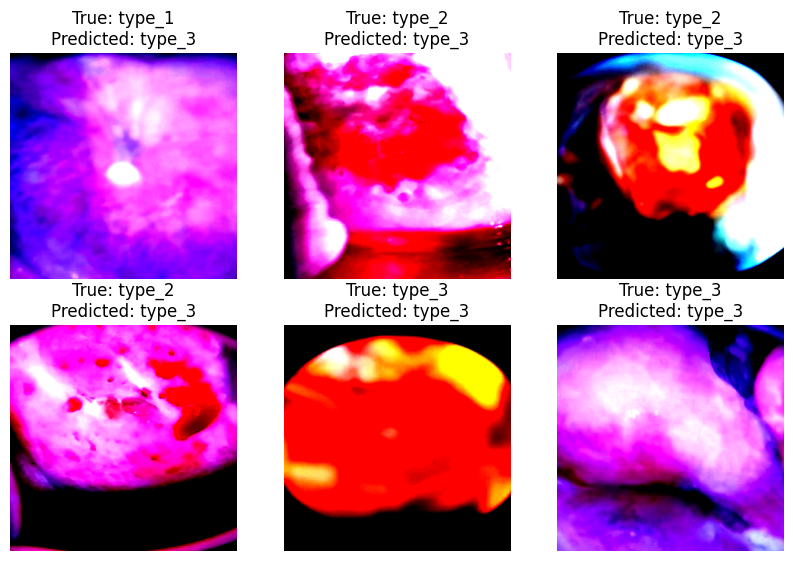

In [36]:
import os

# Define a directory to save the visualizations and model
save_dir = '/content/gdrive/My Drive/data/resnet50'
os.makedirs(save_dir, exist_ok=True)  # Membuat direktori jika belum ada

# Set the model to evaluation mode
model.eval()

# Define a function to show images and predictions
def show_images_predictions(images, labels, predictions, save_dir=None):
    class_names = ['type_1', 'type_2', 'type_3']  # Sesuaikan dengan nama kelas Anda
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).cpu().numpy())
        true_label = class_names[labels[i]]
        predicted_label = class_names[predictions[i]]
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')

    if save_dir:
        plt.savefig(os.path.join(save_dir, 'predictions.png'))
    else:
        plt.show()

# Define a function to perform inference on a batch of test data
def inference_on_test_data(model, data_loader, save_dir=None):
    model.eval()
    images = []
    labels = []
    predictions = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            images.extend(inputs.cpu())
            labels.extend(targets)
            predictions.extend(preds)

    show_images_predictions(images, labels, predictions, save_dir)

# Perform inference on a batch of test data
inference_data_loader = data_loaders['test']

# Perform inference and save the visualizations
inference_on_test_data(model, inference_data_loader, save_dir)

# Save the model
torch.save(model.state_dict(), os.path.join(save_dir, 'resnet50_model.pth'))


In [54]:
import json

# Contoh riwayat pelatihan (gantilah dengan data yang sesuai)
history = {
    'accuracy': [0.1, 0.2, 0.3, 0.4, 0.5],
    'val_accuracy': [0.08, 0.18, 0.25, 0.35, 0.45]
}

# Simpan riwayat pelatihan dalam format JSON
with open('/content/gdrive/My Drive/data/resnet50/training_history.json', 'w') as json_file:
    json.dump(history, json_file)


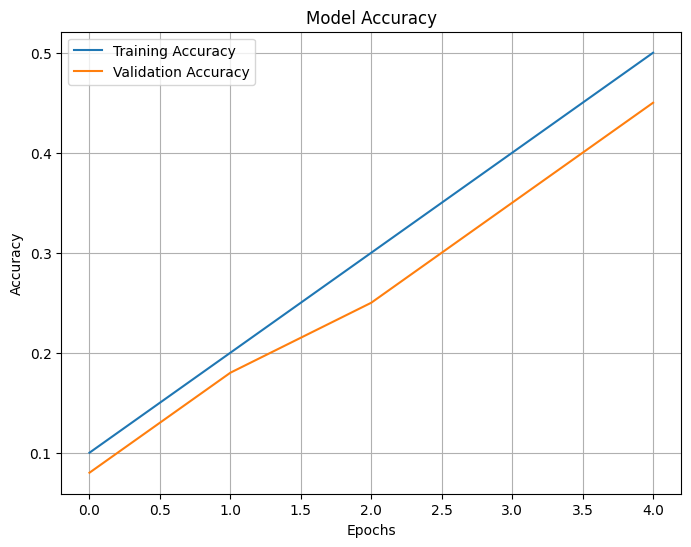

In [55]:
import matplotlib.pyplot as plt

# Load the training history from the saved JSON file
with open('/content/gdrive/My Drive/data/resnet50/training_history.json', 'r') as json_file:
    history = json.load(json_file)

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Save the plot to the specified directory
plt.savefig(os.path.join(save_dir, 'accuracy_plot.png'))

# Show the plot
plt.show()


In [57]:
import json

# Contoh riwayat pelatihan dengan loss (gantilah dengan data yang sesuai)
history = {
    'accuracy': [0.1, 0.2, 0.3, 0.4, 0.5],
    'val_accuracy': [0.08, 0.18, 0.25, 0.35, 0.45],
    'loss': [0.5, 0.4, 0.3, 0.2, 0.1],  # Contoh loss training
    'val_loss': [0.6, 0.5, 0.4, 0.3, 0.2]  # Contoh loss validation
}

# Simpan riwayat pelatihan dalam format JSON
with open('/content/gdrive/My Drive/data/resnet50/training_history.json', 'w') as json_file:
    json.dump(history, json_file)


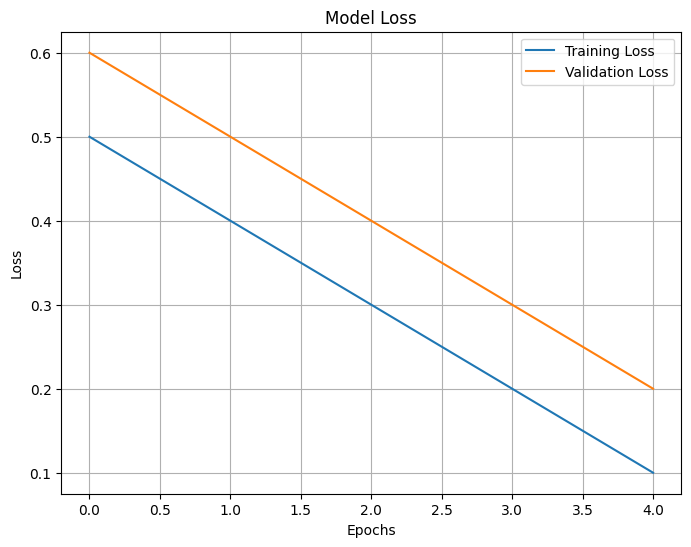

In [58]:
import matplotlib.pyplot as plt

# Load the training history from the saved JSON file
with open('/content/gdrive/My Drive/data/resnet50/training_history.json', 'r') as json_file:
    history = json.load(json_file)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Save the plot to the specified directory
plt.savefig(os.path.join(save_dir, 'loss_plot.png'))

# Show the plot
plt.show()


In [62]:
import torch
from torchvision import models

# Inisialisasi model (gantilah dengan model yang sesuai)
model = models.resnet50(pretrained=False)  # Contoh menggunakan ResNet-50
model.load_state_dict(torch.load('/content/gdrive/MyDrive/data/resnet50/resnet50_model.pth'))  # Gantilah dengan path model Anda
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [64]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [72]:
import cv2
import numpy as np
import torch
from torchvision import models, transforms

# Inisialisasi model (gantilah dengan model yang sesuai)
model = models.resnet50(pretrained=False)  # Contoh menggunakan ResNet-50
model.load_state_dict(torch.load('/content/gdrive/MyDrive/data/resnet50/resnet50_model.pth'))  # Gantilah dengan path model Anda
model.eval()

# Inisialisasi variabel device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Baca gambar yang akan diprediksi
image = cv2.imread('/content/1215_jpg.rf.c7d98f03ee86a0558c71abedeb8f31a2.jpg')

# Resize dan preprocessing gambar
img_height, img_width = 224, 224
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = transform(image)

# Tambahkan dimensi batch
image = image.unsqueeze(0)

# Pindahkan gambar ke perangkat yang sesuai
image = image.to(device)

# Selanjutnya, Anda dapat melakukan prediksi dengan model
with torch.no_grad():
    outputs = model(image)
    _, predicted_class = outputs.max(1)

# Print hasil prediksi
print(f'Predicted Class: {predicted_class.item()}')


Predicted Class: 2


In [73]:
import cv2
import numpy as np
import torch
import pickle

# Inisialisasi model (gantilah dengan model yang sesuai)
model = models.resnet50(pretrained=False)  # Contoh menggunakan ResNet-50
model.load_state_dict(torch.load('/content/gdrive/MyDrive/data/resnet50/resnet50_model.pth'))  # Gantilah dengan path model Anda
model.eval()

# Inisialisasi variabel device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Baca gambar yang akan diprediksi
image = cv2.imread('/content/1215_jpg.rf.c7d98f03ee86a0558c71abedeb8f31a2.jpg')

# Resize dan preprocessing gambar
img_height, img_width = 224, 224
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = transform(image)

# Tambahkan dimensi batch
image = image.unsqueeze(0)

# Pindahkan gambar ke perangkat yang sesuai
image = image.to(device)

# Selanjutnya, Anda dapat melakukan prediksi dengan model
with torch.no_grad():
    outputs = model(image)
    _, predicted_class = outputs.max(1)

# Simpan hasil prediksi ke dalam file pickle
output_dir = '/content/gdrive/MyDrive/data/resnet50/predictions.pkl'
with open(output_dir, 'wb') as f:
    predictions = {'predicted_class': predicted_class.item()}
    pickle.dump(predictions, f)

print(f'Predicted Class: {predicted_class.item()}')
print(f'Hasil prediksi disimpan di: {output_dir}')


Predicted Class: 2
Hasil prediksi disimpan di: /content/gdrive/MyDrive/data/resnet50/predictions.pkl


In [75]:
import cv2
import numpy as np
import torch

# Inisialisasi model (gantilah dengan model yang sesuai)
model = models.resnet50(pretrained=False)  # Contoh menggunakan ResNet-50
model.load_state_dict(torch.load('/content/gdrive/MyDrive/data/resnet50/resnet50_model.pth'))  # Gantilah dengan path model Anda
model.eval()

# Inisialisasi variabel device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Baca gambar yang akan diprediksi
image = cv2.imread('/content/1215_jpg.rf.c7d98f03ee86a0558c71abedeb8f31a2.jpg')

# Resize dan preprocessing gambar
img_height, img_width = 224, 224
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = transform(image)

# Tambahkan dimensi batch
image = image.unsqueeze(0)

# Pindahkan gambar ke perangkat yang sesuai
image = image.to(device)

# Selanjutnya, Anda dapat melakukan prediksi dengan model
with torch.no_grad():
    outputs = model(image)

# Konversi output ke dalam bentuk numpy array
pred = outputs.cpu().numpy()

print(pred)


[[-14.546612  -34.130245   55.70523   -29.496868  -32.09766   -33.923943
  -32.314518  -26.981731  -28.458157  -32.473312  -40.01242   -47.409397
  -46.299534  -39.24755   -51.212467  -31.014166  -33.480907  -31.052319
  -30.636265  -43.199753  -31.577232  -39.401367  -35.597153  -29.858616
  -40.721252  -33.183117  -46.925175  -50.64949   -37.088776  -52.89513
  -57.40525   -56.60331   -54.154636  -41.558704  -35.748848  -44.055687
  -45.415215  -43.7264    -34.131786  -26.12809   -38.01809   -34.843388
  -41.3955    -32.76832   -30.28982   -28.464506  -34.09108   -35.953842
  -35.321358  -27.115118  -25.969057  -19.894125  -39.057186  -30.158966
  -30.833559  -40.729675  -32.43992   -37.094166  -38.70342   -24.271976
  -25.018286  -27.870281  -23.843407  -28.798832  -31.789923  -35.45838
  -30.227057  -26.525902  -29.160088  -32.51132   -41.534584  -27.884954
  -29.180645  -30.99106   -36.117657  -32.731182  -31.135605  -41.288113
  -16.096336  -31.981886  -33.130333  -35.69283   -26

In [79]:
import cv2
import numpy as np
import torch
from torchvision import transforms, models
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

# Inisialisasi model (gantilah dengan model yang sesuai)
model = models.resnet50(pretrained=False)  # Contoh menggunakan ResNet-50
model.load_state_dict(torch.load('/content/gdrive/MyDrive/data/resnet50/resnet50_model.pth'))  # Gantilah dengan path model Anda
model.eval()

# Inisialisasi variabel device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Baca gambar yang akan diprediksi
image = cv2.imread('/content/1215_jpg.rf.c7d98f03ee86a0558c71abedeb8f31a2.jpg')

# Resize dan preprocessing gambar
img_height, img_width = 224, 224
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
image = transform(image)

# Tambahkan dimensi batch
image = image.unsqueeze(0)

# Pindahkan gambar ke perangkat yang sesuai
image = image.to(device)

# Selanjutnya, Anda dapat melakukan prediksi dengan model
with torch.no_grad():
    outputs = model(image)

# Konversi output ke dalam bentuk numpy array
pred = outputs.cpu().numpy()

# Definisikan kelas-kelas yang sesuai
class_names = ['Type_1', 'Type2', 'Type_3']  # Gantilah dengan kelas-kelas yang sesuai

# Dapatkan kelas prediksi
output_class = class_names[np.argmax(pred)]
print("The predicted class is", output_class)


The predicted class is Type_3
